### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import matplotlib
import seaborn as sns
from skimage.measure import find_contours
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import xtrack as xt
import json
import pickle
from scipy import interpolate
import numpy as np 
os.chdir('/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/analysis/nb_angle_scan/')
# Local imports
# sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



## Positive octupoles 

### 30 cm


In [2]:
# Define study
STUDY_NAME = "PU_function_all_optics"
COLLIDER = "collider_00"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)


df

normalized amplitude in xy-plane  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy                                         
lhcb1 collider_00        6.000000e+10            100.0          62.313 60.318                               4.5   
                                                 102.5          62.313 60.318                               4.5   
                                                 105.0          62.313 60.318                               4.5   
                                                 107.5          62.313 60.318                               4.5   
                                                 110.0          62.313 60.318                               4.5   
...                                                                                                         ...   
      collider_02        1.400000e+11            160.0          62.313 60.318                               4.5   
                                                 162.5          62.313 60.318                               4.5   
                                                 165.0          62.313 60.318                               4.5   
                                                 167.5          62.313 60.318                               4.5   
                                                 170.0          62.313 60.318                               4.5   

                                                                                   qx  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy               
lhcb1 collider_00        6.000000e+10            100.0          62.313 60.318  62.313   
                                                 102.5          62.313 60.318  62.313   
                                                 105.0          62.313 60.318  62.313   
                                                 107.5          62.313 60.318  62.313   
                                                 110.0          62.313 60.318  62.313   
...                                                                               ...   
      collider_02        1.400000e+11            160.0          62.313 60.318  62.313   
                                                 162.5          62.313 60.318  62.313   
                                                 165.0          62.313 60.318  62.313   
                                                 167.5          62.313 60.318  62.313   
                                                 170.0          62.313 60.318  62.313   

                                                                                   qy  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy               
lhcb1 collider_00        6.000000e+10            100.0          62.313 60.318  60.318   
                                                 102.5          62.313 60.318  60.318   
                                                 105.0          62.313 60.318  60.318   
                                                 107.5          62.313 60.318  60.318   
                                                 110.0          62.313 60.318  60.318   
...                                                                               ...   
      collider_02        1.400000e+11            160.0          62.313 60.318  60.318   
                                                 162.5          62.313 60.318  60.318   
                                                 165.0          62.313 60.318  60.318   
                                                 167.5          62.313 60.318  60.318   
                                                 170.0          62.313 60.318  60.318   

                                                                                dqx  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy             
lhcb1 collider_00        6.000000e+10            100.0          62.313 60.318  15.0   
      

In [3]:
# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot.index /= 1e11
df_to_plot


crossing_angle,100.0,102.5,105.0,107.5,110.0,112.5,115.0,117.5,120.0,122.5,...,147.5,150.0,152.5,155.0,157.5,160.0,162.5,165.0,167.5,170.0
num_particles_per_bunch,,,,,,,,,,,,,,,,,,,,,
0.600,4.5,4.5,4.5,4.500,4.500,4.750,4.719,4.625,5.000,5.062,...,6.188,6.031,6.469,6.562,6.594,6.438,6.750,6.750,6.938,6.938
0.625,4.5,4.5,4.5,4.531,4.500,4.594,4.625,4.906,4.938,4.969,...,6.188,6.000,6.344,6.406,6.469,6.406,6.656,6.688,7.031,6.938
0.650,4.5,4.5,4.5,4.500,4.500,4.531,4.562,4.562,4.875,5.031,...,6.000,6.219,6.312,6.312,6.125,6.406,6.344,6.531,6.656,6.938
0.675,4.5,4.5,4.5,4.500,4.500,4.500,4.500,4.625,4.812,4.969,...,6.125,5.875,6.312,6.250,6.438,6.281,6.688,6.562,6.500,6.625
0.700,4.5,4.5,4.5,4.500,4.531,4.594,4.500,4.531,4.594,4.875,...,6.062,6.031,6.062,6.281,6.156,6.469,6.406,6.531,6.625,6.844
0.725,4.5,4.5,4.5,4.500,4.500,4.531,4.500,4.656,4.656,4.938,...,5.875,5.906,6.219,5.969,6.156,6.375,6.438,6.344,6.656,6.594
0.750,4.5,4.5,4.5,4.500,4.500,4.500,4.531,4.500,4.750,4.781,...,5.750,5.875,5.906,6.125,6.281,6.219,6.219,6.469,6.500,6.625
0.775,4.5,4.5,4.5,4.500,4.500,4.531,4.500,4.500,4.656,4.719,...,5.719,5.906,6.031,6.188,6.000,6.156,6.156,6.531,6.500,6.062
0.800,4.5,4.5,4.5,4.500,4.500,4.500,4.500,4.500,4.656,4.688,...,5.812,5.812,5.875,6.031,5.969,6.062,6.031,6.125,6.219,6.312


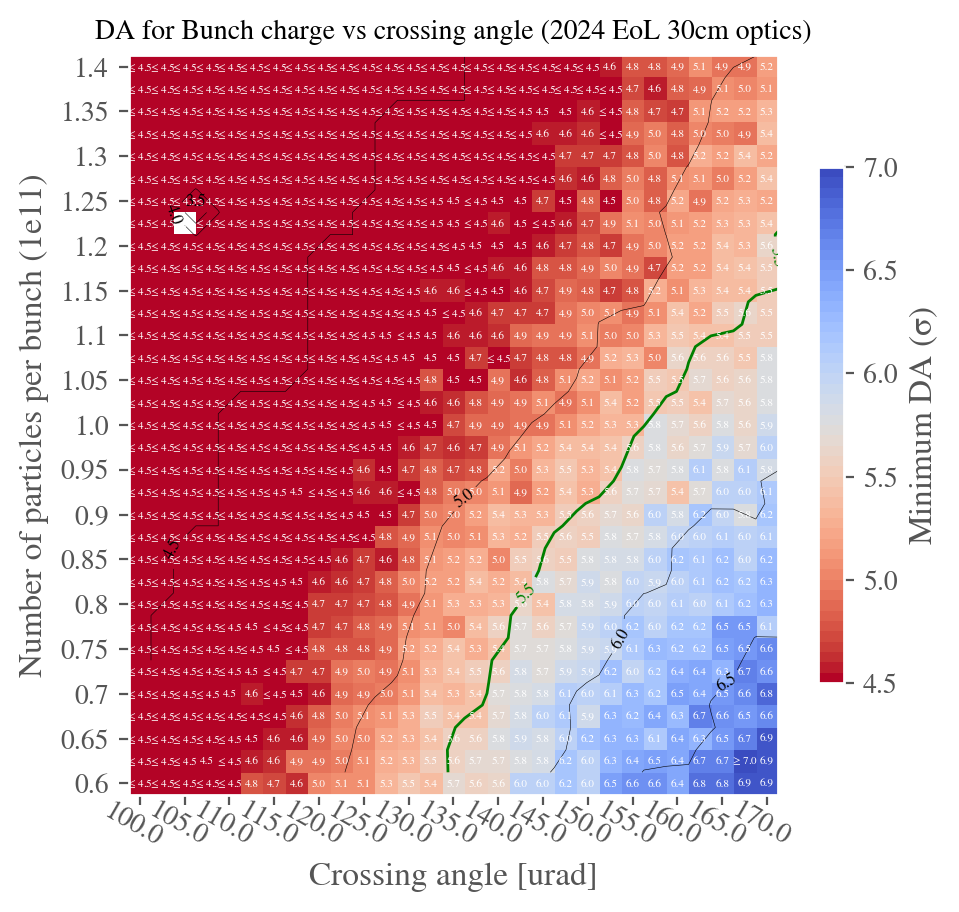

In [4]:
# Load configuration files
qx = 62.313
qy = 60.318
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER + '_' + str(qx) + '_' + str(qy),
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 30cm optics)"
)


In [5]:
df_30_cm = df_to_plot.copy()

### 26cm

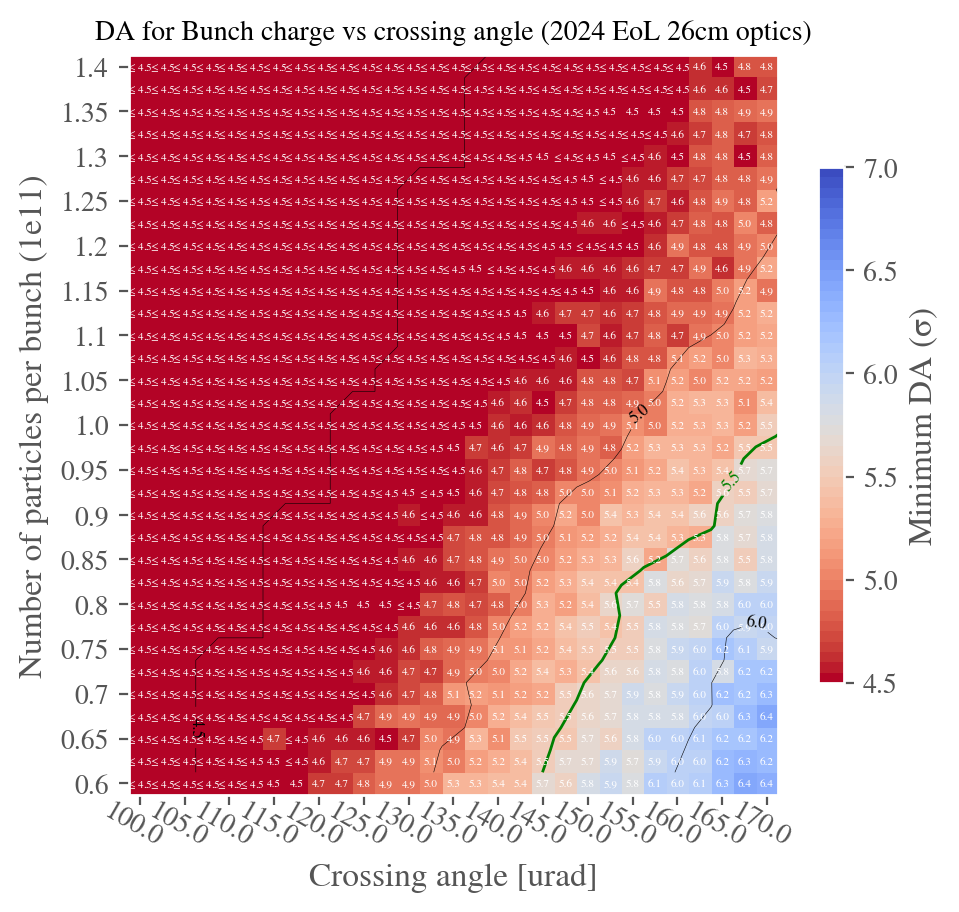

In [6]:
# Define study
STUDY_NAME = "PU_function_all_optics"
COLLIDER = "collider_01"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot.index /= 1e11
# df_to_plot

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER + '_' + str(qx) + '_' + str(qy),
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 26cm optics)"
)

In [7]:
df_26_cm = df_to_plot.copy()

### 22 cm

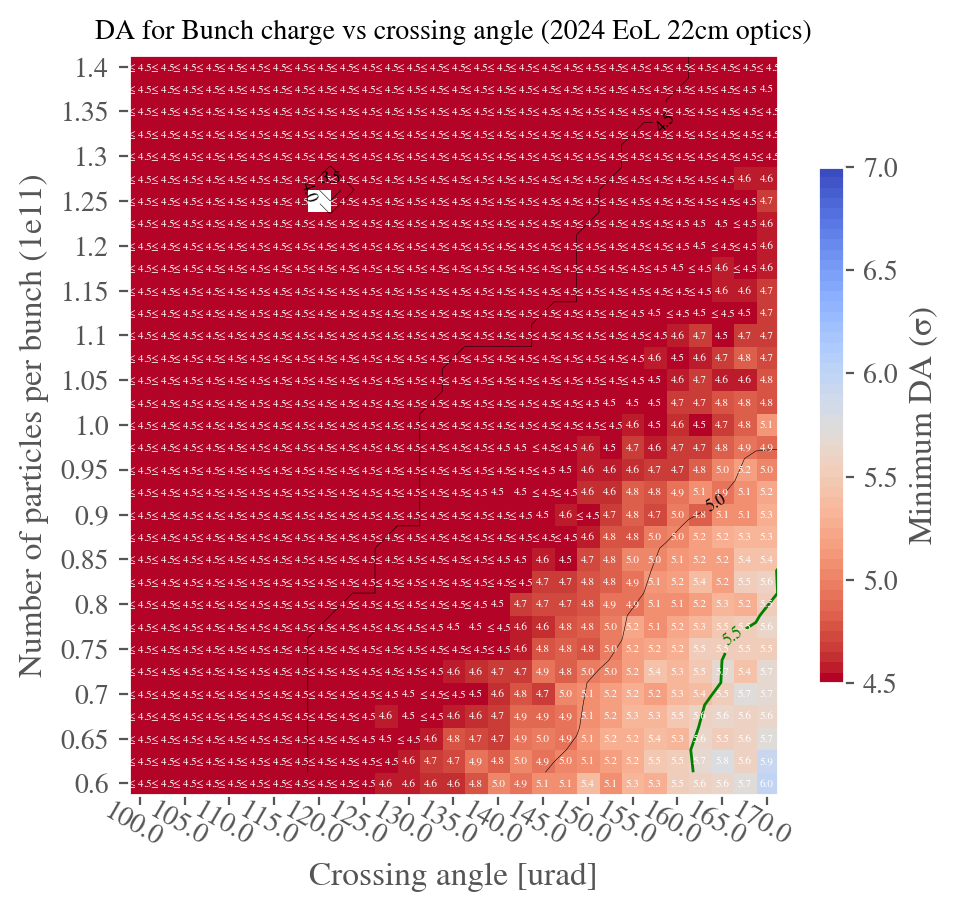

In [8]:
# Define study
STUDY_NAME = "PU_function_all_optics"
COLLIDER = "collider_02"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot.index /= 1e11
# df_to_plot

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER + '_' + str(qx) + '_' + str(qy),
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 22cm optics)"
)

In [9]:
df_22_cm = df_to_plot.copy()

## Negative octupoles

### 30cm

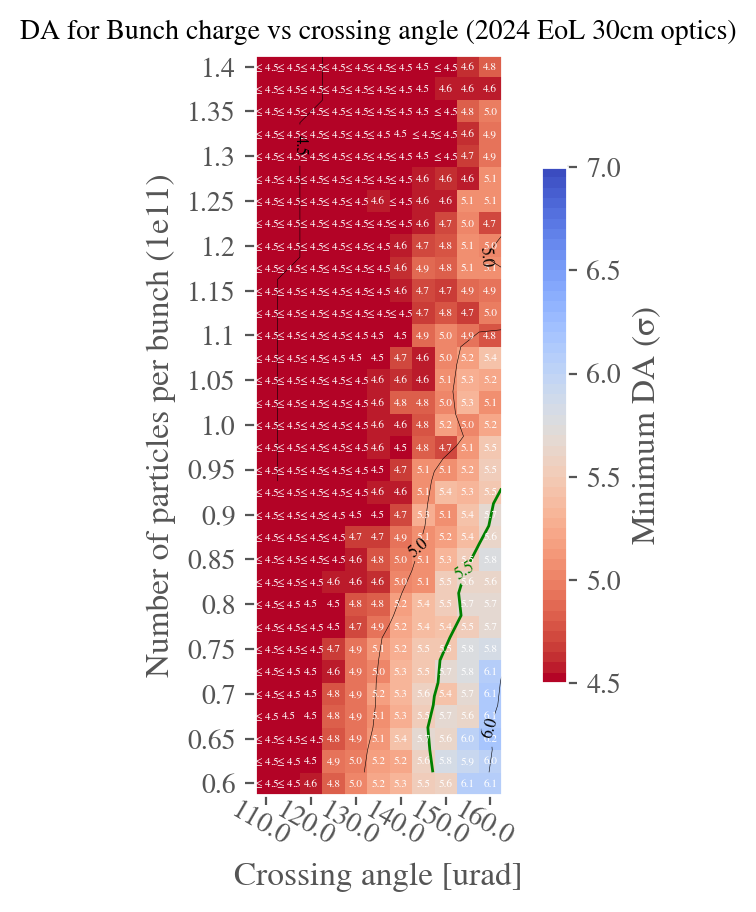

In [10]:
# Define study
STUDY_NAME = "PU_function_all_optics_neg_oct_corr"
COLLIDER = "collider_00"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot.index /= 1e11
# df_to_plot

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER + '_' + str(qx) + '_' + str(qy),
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 30cm optics)"
)

In [11]:
df_30_cm_neg = df_to_plot.copy()

### 26cm

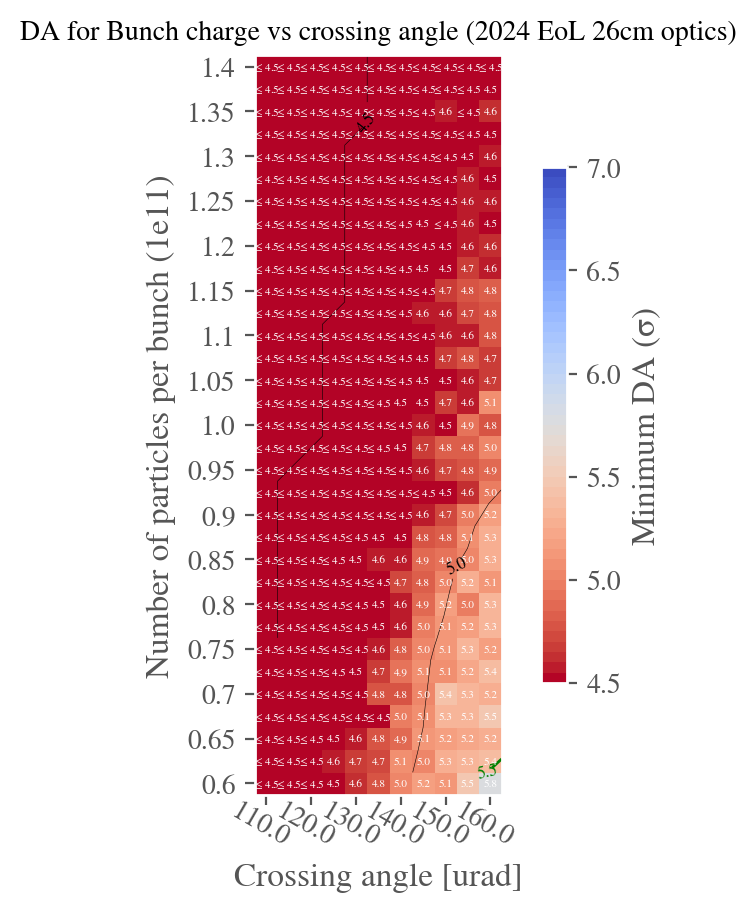

In [12]:
# Define study
STUDY_NAME = "PU_function_all_optics_neg_oct_corr"
COLLIDER = "collider_01"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot.index /= 1e11
# df_to_plot

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER + '_' + str(qx) + '_' + str(qy),
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 26cm optics)"
)

In [13]:
df_26_cm_neg = df_to_plot.copy()

### 22cm

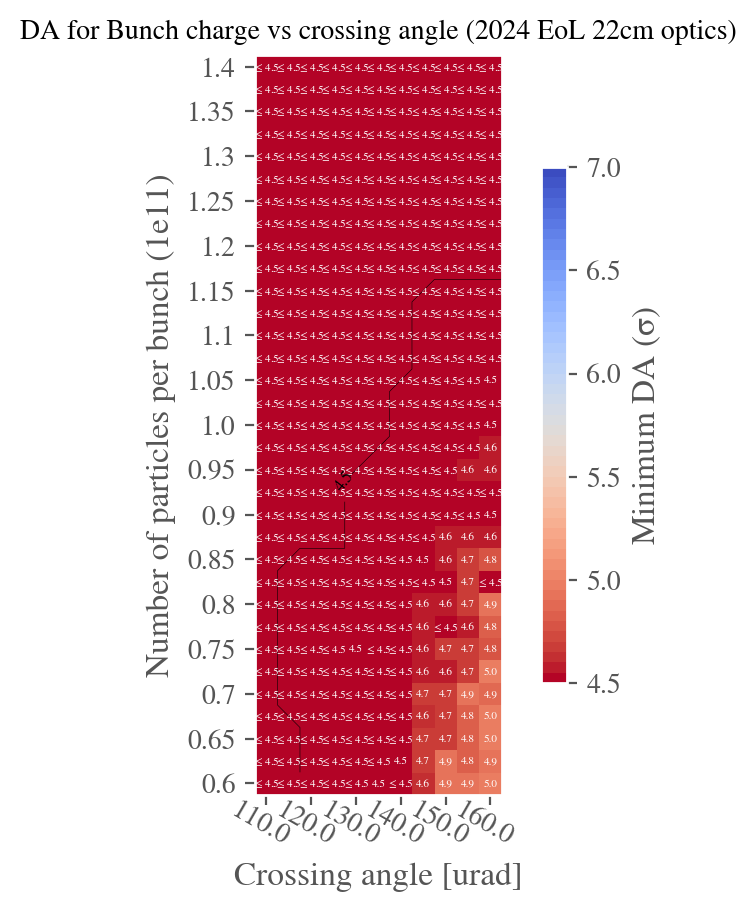

In [14]:
# Define study
STUDY_NAME = "PU_function_all_optics_neg_oct_corr"
COLLIDER = "collider_02"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot.index /= 1e11
# df_to_plot

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER + '_' + str(qx) + '_' + str(qy),
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = False,
    green_contour = 5.5,
    extended_diagonal=False,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel="Crossing angle [urad]",
    ylabel="Number of particles per bunch (1e11)",
    vmin = 4.5,
    vmax = 7.,
    plot_diagonal_lines= False,
    xaxis_ticks_on_top=False,
    title="DA for Bunch charge vs crossing angle (2024 EoL 22cm optics)"
)

In [15]:
df_22_cm_neg = df_to_plot.copy()

### Find contours at 5.5 sigma

In [16]:
# Smooth a lot to have a smooth contour
smooth_30cm = gaussian_filter(df_30_cm.values, sigma=1)
contours_30cm = find_contours(smooth_30cm, level=5)

# Also get the same curve for 26cm and 22cm
smooth_26cm = gaussian_filter(df_26_cm.values, sigma=1)
contours_26cm = find_contours(smooth_26cm, level=5)

smooth_22cm = gaussian_filter(df_22_cm.values, sigma=1)
contours_22cm = find_contours(smooth_22cm, level=5)

# Same with negative octupoles
smooth_30cm_neg = gaussian_filter(df_30_cm_neg.values, sigma=1)
contours_30cm_neg = find_contours(smooth_30cm_neg, level=5)

# Also get the same curve for 26cm and 22cm
smooth_26cm_neg = gaussian_filter(df_26_cm_neg.values, sigma=1)
contours_26cm_neg = find_contours(smooth_26cm_neg, level=5)

smooth_22cm_neg = gaussian_filter(df_22_cm_neg.values, sigma=1)
contours_22cm_neg = find_contours(smooth_22cm_neg, level=5)

In [17]:
# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

# %config InlineBackend.figure_format='pdf'

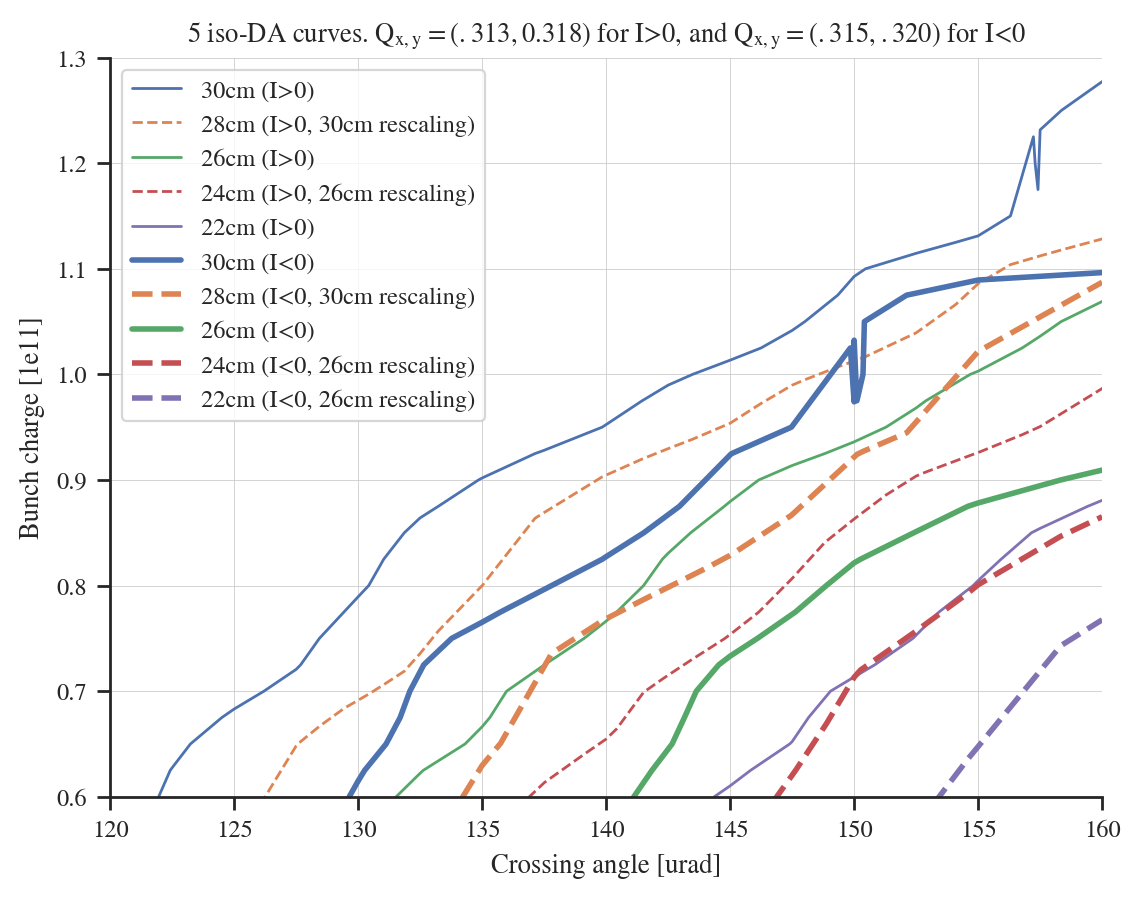

In [18]:

# Extract curve
contour_for_extraction_30cm = contours_30cm[0][contours_30cm[0][:, 1].argsort()]
contour_for_extraction_26cm = contours_26cm[0][contours_26cm[0][:, 1].argsort()]
contour_for_extraction_22cm = contours_22cm[0][contours_22cm[0][:, 1].argsort()]

contour_for_extraction_30cm_neg = contours_30cm_neg[0][contours_30cm_neg[0][:, 1].argsort()]
contour_for_extraction_26cm_neg = contours_26cm_neg[0][contours_26cm_neg[0][:, 1].argsort()]
# contour_for_extraction_22cm_neg = contours_22cm_neg[0][contours_22cm_neg[0][:, 1].argsort()]

x_30cm = contour_for_extraction_30cm[:,1]
y_30cm = contour_for_extraction_30cm[:,0]

x_26cm = contour_for_extraction_26cm[:,1]
y_26cm = contour_for_extraction_26cm[:,0]

x_22cm = contour_for_extraction_22cm[:,1]
y_22cm = contour_for_extraction_22cm[:,0]

x_30cm_neg = contour_for_extraction_30cm_neg[:,1]
y_30cm_neg = contour_for_extraction_30cm_neg[:,0]

x_26cm_neg = contour_for_extraction_26cm_neg[:,1]
y_26cm_neg = contour_for_extraction_26cm_neg[:,0]

# x_22cm_neg = contour_for_extraction_22cm_neg[:,1]
# y_22cm_neg = contour_for_extraction_22cm_neg[:,0]

# Convert back to initial units
f1 = interpolate.interp1d(range(len(df_30_cm.index)), df_30_cm.index)
f2 = interpolate.interp1d(range(len(df_30_cm.columns)), df_30_cm.columns)

f1_neg = interpolate.interp1d(range(len(df_30_cm_neg.index)), df_30_cm_neg.index)
f2_neg = interpolate.interp1d(range(len(df_30_cm_neg.columns)), df_30_cm_neg.columns)

x_real_30cm = f2(x_30cm)
y_real_30cm = f1(y_30cm)

x_real_26cm = f2(x_26cm)
y_real_26cm = f1(y_26cm)

x_real_22cm = f2(x_22cm)
y_real_22cm = f1(y_22cm)

x_real_30cm_neg = f2_neg(x_30cm_neg)
y_real_30cm_neg = f1_neg(y_30cm_neg)

x_real_26cm_neg = f2_neg(x_26cm_neg)
y_real_26cm_neg = f1_neg(y_26cm_neg)

# x_real_22cm_neg = f2(x_22cm_neg)
# y_real_22cm_neg = f1(y_22cm_neg)

# Compute rescaled 26cm and 22cm
f3 = interpolate.interp1d(x_real_30cm, y_real_30cm, bounds_error = False, fill_value = 'extrapolate')
f4 = interpolate.interp1d(x_real_26cm, y_real_26cm, bounds_error = False, fill_value = 'extrapolate')

f3_neg = interpolate.interp1d(x_real_30cm_neg, y_real_30cm_neg, bounds_error = False, fill_value = 'extrapolate')
f4_neg = interpolate.interp1d(x_real_26cm_neg, y_real_26cm_neg, bounds_error = False, fill_value = 'extrapolate')

rescaled_y_24cm = f4(x_real_26cm * np.sqrt(24/26))
rescaled_y_28cm = f3(x_real_30cm * np.sqrt(28/30))

rescaled_y_22cm_neg = f4_neg(x_real_26cm_neg * np.sqrt(22/26))
rescaled_y_24cm_neg = f4_neg(x_real_26cm_neg * np.sqrt(24/26))
rescaled_y_28cm_neg = f3_neg(x_real_30cm_neg * np.sqrt(28/30))

plt.plot(x_real_30cm,y_real_30cm, color = 'C0', label = '30cm (I>0)', lw = 1)
plt.plot(x_real_30cm, rescaled_y_28cm, '--', color = 'C1', label = '28cm (I>0, 30cm rescaling)', lw = 1)
plt.plot(x_real_26cm,y_real_26cm, color = 'C2', label = '26cm (I>0)', lw = 1)
plt.plot(x_real_26cm, rescaled_y_24cm, '--', color = 'C3', label = '24cm (I>0, 26cm rescaling)', lw = 1)
plt.plot(x_real_22cm,y_real_22cm, color = 'C4', label = '22cm (I>0)', lw = 1)

plt.plot(x_real_30cm_neg,y_real_30cm_neg, color = 'C0', label = '30cm (I<0)', lw = 2)
plt.plot(x_real_30cm_neg, rescaled_y_28cm_neg, '--', color = 'C1', label = '28cm (I<0, 30cm rescaling)', lw = 2)
plt.plot(x_real_26cm_neg,y_real_26cm_neg, color = 'C2', label = '26cm (I<0)', lw = 2)
plt.plot(x_real_26cm_neg, rescaled_y_24cm_neg, '--', color = 'C3', label = '24cm (I<0, 26cm rescaling)', lw = 2)
plt.plot(x_real_26cm_neg,rescaled_y_22cm_neg, '--', color = 'C4', label = '22cm (I<0, 26cm rescaling)', lw = 2)

plt.xlabel("Crossing angle [urad]")
plt.ylabel("Bunch charge [1e11]")
plt.title(r"5 iso-DA curves. $Q_{x,y} = (.313, 0.318)$ for I>0, and $Q_{x,y} = (.315, .320)$ for I<0")
plt.ylim(0.6, 1.3)
plt.xlim(120,160)
plt.legend()
plt.grid()
plt.savefig('plots/iso_DA_5.pdf')
plt.show()

### Convert to PU functions

In [19]:
with open("PU_5.pkl", "rb") as f:
    ll_PU_5sig = pickle.load(f)
    
    # Function to convert bunch charge to PU for each optics
f_nb_to_PU_30cm = interpolate.interp1d(y_real_30cm, ll_PU_5sig[0], fill_value = 'extrapolate')
f_nb_to_PU_28cm = lambda y: (f_nb_to_PU_30cm(y) + f_nb_to_PU_26cm(y))/2
f_nb_to_PU_26cm = interpolate.interp1d(y_real_26cm, ll_PU_5sig[1], fill_value = 'extrapolate')
f_nb_to_PU_24cm = lambda y: (f_nb_to_PU_26cm(y) + f_nb_to_PU_22cm(y))/2
f_nb_to_PU_22cm = interpolate.interp1d(y_real_22cm, ll_PU_5sig[2], fill_value = 'extrapolate')

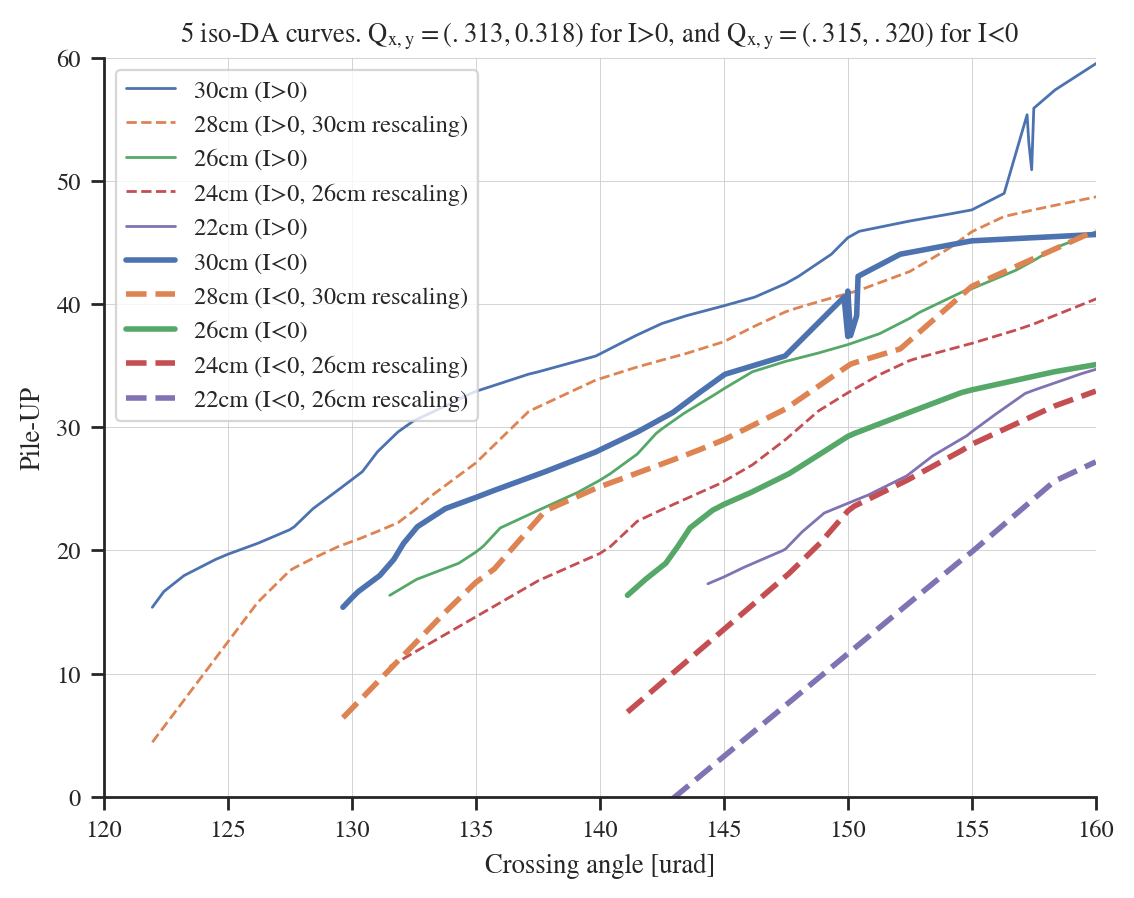

In [20]:

plt.plot(x_real_30cm, f_nb_to_PU_30cm(y_real_30cm), color = 'C0', label = '30cm (I>0)', lw = 1)
plt.plot(x_real_30cm, f_nb_to_PU_28cm(rescaled_y_28cm), '--', color = 'C1', label = '28cm (I>0, 30cm rescaling)', lw = 1)
plt.plot(x_real_26cm, f_nb_to_PU_26cm(y_real_26cm), color = 'C2', label = '26cm (I>0)', lw = 1)
plt.plot(x_real_26cm, f_nb_to_PU_24cm(rescaled_y_24cm), '--', color = 'C3', label = '24cm (I>0, 26cm rescaling)', lw = 1)
plt.plot(x_real_22cm, f_nb_to_PU_22cm(y_real_22cm), color = 'C4', label = '22cm (I>0)', lw = 1)

plt.plot(x_real_30cm_neg,f_nb_to_PU_30cm(y_real_30cm_neg), color = 'C0', label = '30cm (I<0)', lw = 2)
plt.plot(x_real_30cm_neg, f_nb_to_PU_28cm(rescaled_y_28cm_neg), '--', color = 'C1', label = '28cm (I<0, 30cm rescaling)', lw = 2)
plt.plot(x_real_26cm_neg,f_nb_to_PU_26cm(y_real_26cm_neg), color = 'C2', label = '26cm (I<0)', lw = 2)
plt.plot(x_real_26cm_neg, f_nb_to_PU_24cm(rescaled_y_24cm_neg), '--', color = 'C3', label = '24cm (I<0, 26cm rescaling)', lw = 2)
plt.plot(x_real_26cm_neg,f_nb_to_PU_22cm(rescaled_y_22cm_neg), '--', color = 'C4', label = '22cm (I<0, 26cm rescaling)', lw = 2)


plt.xlabel("Crossing angle [urad]")
plt.ylabel("Pile-UP")
plt.title(r"5 iso-DA curves. $Q_{x,y} = (.313, 0.318)$ for I>0, and $Q_{x,y} = (.315, .320)$ for I<0")
plt.xlim(120,160)
plt.ylim(0., 60)
plt.legend()
plt.grid()
plt.savefig('plots/iso_DA_5_PU.pdf')
plt.show()

